# ANN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

### Create dummy variables

In [4]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

### Concatenate the Data Frames

In [5]:
X=pd.concat([X,geography,gender],axis=1)

### Drop Unnecessary columns

In [6]:
X=X.drop(['Geography','Gender'],axis=1)

### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Now let's make the ANN!

### Importing the Keras libraries and packages

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


Using TensorFlow backend.


In [10]:
# Initialising the ANN
classifier = Sequential()

In [11]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))



/home/machadalouser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  


In [12]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))


/home/machadalouser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  


In [13]:
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))


/home/machadalouser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  


In [14]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

/home/machadalouser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 159us/step - loss: 0.6601 - accuracy: 0.6630 - val_loss: 0.5438 - val_accuracy: 0.7933
Epoch 2/100
5359/5359 [==============================] - 1s 141us/step - loss: 0.5189 - accuracy: 0.7959 - val_loss: 0.5030 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 1s 135us/step - loss: 0.4927 - accuracy: 0.7964 - val_loss: 0.4863 - val_accuracy: 0.7952
Epoch 4/100
5359/5359 [==============================] - 1s 129us/step - loss: 0.4724 - accuracy: 0.7988 - val_loss: 0.4685 - val_accuracy: 0.7997
Epoch 5/100
5359/5359 [==============================] - 1s 126us/step - loss: 0.4542 - accuracy: 0.8043 - val_loss: 0.4547 - val_accuracy: 0.8084
Epoch 6/100
5359/5359 [==============================] - 1s 135us/step - loss: 0.4391 - accuracy: 0.8108 - val_loss: 0.4450 - val_accuracy: 0.8160
Epoch 7/100
5359/5359 [==============================] - 1s 125us/step

5359/5359 [==============================] - 1s 134us/step - loss: 0.3301 - accuracy: 0.8660 - val_loss: 0.3562 - val_accuracy: 0.8550
Epoch 57/100
5359/5359 [==============================] - 1s 134us/step - loss: 0.3301 - accuracy: 0.8653 - val_loss: 0.3561 - val_accuracy: 0.8542
Epoch 58/100
5359/5359 [==============================] - 1s 143us/step - loss: 0.3300 - accuracy: 0.8640 - val_loss: 0.3565 - val_accuracy: 0.8538
Epoch 59/100
5359/5359 [==============================] - 1s 124us/step - loss: 0.3298 - accuracy: 0.8640 - val_loss: 0.3560 - val_accuracy: 0.8561
Epoch 60/100
5359/5359 [==============================] - 1s 124us/step - loss: 0.3297 - accuracy: 0.8647 - val_loss: 0.3562 - val_accuracy: 0.8557
Epoch 61/100
5359/5359 [==============================] - 1s 119us/step - loss: 0.3297 - accuracy: 0.8651 - val_loss: 0.3560 - val_accuracy: 0.8542
Epoch 62/100
5359/5359 [==============================] - 1s 134us/step - loss: 0.3293 - accuracy: 0.8642 - val_loss: 0.3557 

In [23]:
''''''''
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()'''''''

SyntaxError: invalid syntax (<ipython-input-23-1733b99efc0c>, line 12)

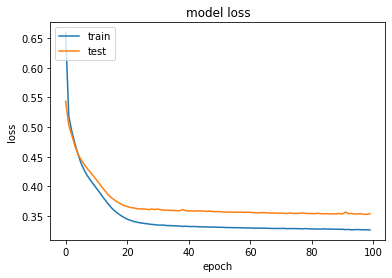

In [16]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)



In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1538,   57],
       [ 214,  191]])

In [19]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8645